<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork23455645-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Peer Review Assignment - Data Engineer - Webscraping


Estimated time needed: **20** minutes


## Objectives

In this part you will:

*   Use webscraping to get bank information


For this lab, we are going to be using Python and several Python libraries. Some of these libraries might be installed in your lab environment or in SN Labs. Others may need to be installed by you. The cells below will install these libraries when executed.


In [ ]:
#!mamba install pandas==1.3.3 -y
#!mamba install requests==2.26.0 -y
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y

## Imports

Import any additional libraries you may need here.


In [1]:
from bs4 import BeautifulSoup
import html5lib
import requests
import pandas as pd

## Extract Data Using Web Scraping


The wikipedia webpage [https://en.wikipedia.org/wiki/List_of_largest_banks](https://en.wikipedia.org/wiki/List_of_largest_banks?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork23455645-2022-01-01) provides information about largest banks in the world by various parameters. Scrape the data from the table 'By market capitalization' and store it in a JSON file.


### Webpage Contents

Gather the contents of the webpage in text format using the `requests` library and assign it to the variable <code>html_data</code>


In [9]:
url = "https://en.wikipedia.org/wiki/List_of_largest_banks?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0221ENSkillsNetwork23455645-2022-01-01"
r = requests.get(url)
html_data = r.text
print(type(html_data))

<class 'str'>


<b>Question 1</b> Print out the output of the following line, and remember it as it will be a quiz question:


In [8]:
html_data[101:124]

'List of largest banks -'

### Scraping the Data

<b> Question 2</b> Using the contents and `beautiful soup` load the data from the `By market capitalization` table into a `pandas` dataframe. The dataframe should have the bank `Name` and `Market Cap (US$ Billion)` as column names.  Display the first five rows using head.


Using BeautifulSoup parse the contents of the webpage.


In [200]:
soup = BeautifulSoup(html_data, "html.parser")
data = {'rank' :[], 'bank name':[],'country':[],'market cap':[]}

# Getting the HTML object
h2 = soup.find('span',{'id':"By_market_capitalization"}).parent
table = h2.find_next('table').find_all('tr')

Load the data from the `By market capitalization` table into a pandas dataframe. The dataframe should have the bank `Name` and `Market Cap (US$ Billion)` as column names. Using the empty dataframe `data` and the given loop extract the necessary data from each row and append it to the empty dataframe.


In [216]:
data = {'rank' :[], 'bank name':[],'country':[],'market cap':[]}

# Extracting data from the table
for i in table[1:] :
    cells = i.find_all('td')
    data['rank'].append(cells[0].text.strip('\n'))
    data['bank name'].append(cells[1].find_all('a')[1].text)
    data['country'].append(cells[1].find_all('a')[0]['title'])
    data['market cap'].append(cells[2].text.strip('\n'))
    
data['market cap'][0] = data['market cap'][0][0:6]

# Formating the data on market cap column
for i in range(len(data['market cap'])) :
    data['market cap'][i] = float(data['market cap'][i]) 

# Creating the DF
df = pd.DataFrame(data)

df.head(5)

,rank,bank name,country,market cap
0,1,JPMorgan Chase,United States,400.37
1,2,Industrial and Commercial Bank of China,China,295.65
2,3,Bank of America,United States,279.73
3,4,Wells Fargo,United States,214.34
4,5,China Construction Bank,China,207.98


**Question 3** Display the first five rows using the `head` function.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        50 non-null     object 
 1   bank name   50 non-null     object 
 2   country     50 non-null     object 
 3   market cap  50 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.7+ KB
None


<AxesSubplot:xlabel='country'>

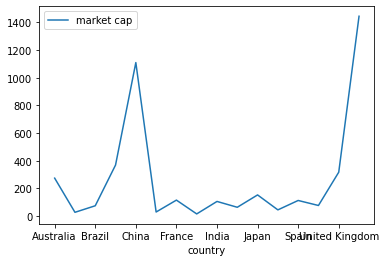

In [215]:
print(df.info())

df.groupby('country').sum().plot()


### Loading the Data

Usually you will Load the `pandas` dataframe created above into a JSON named `bank_market_cap.json` using the `to_json()` function, but this time the data will be sent to another team who will split the data file into two files and inspect it. If you save the data it will interfere with the next part of the assignment.


In [214]:
import json

df_json = df.to_json(orient="index")

with open("sample.json", "w") as outfile:
    outfile.write(df_json)


## Authors


Ramesh Sannareddy, Joseph Santarcangelo and Azim Hirjani


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By          | Change Description                 |
| ----------------- | ------- | ------------------- | ---------------------------------- |
| 2022-07-12        | 0.2     | Appalabhaktula Hema | Corrected the code and markdown    |
| 2020-11-25        | 0.1     | Ramesh Sannareddy   | Created initial version of the lab |


Copyright © 2020 IBM Corporation.
